##  PCA : CVD

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
sns.set(font_scale=1.8)

### Data

In [66]:
data = pd.read_csv('../datareader/score/score.csv')
data = data.set_index('Protein')
def rearrang(olddf):
    col = ['CVA','IHD','CM','ARR','VD','CHD']
    newdf = pd.DataFrame()
    for t in col:
        newdf[t]= olddf[t]
    return newdf
ndf = rearrang(data)
ndf.head()

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072
aromatic-l-amino-acid_decarboxylase,0.055959,0.010260,0.011459,0.070661,0.000000,0.007809
nadph_oxidase_activator_1,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000
tumor_necrosis_factor_ligand_superfamily_member_14,0.035732,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
def feature_norm(df):
    dff = df.copy(deep =True)
    fchr = ['CVA','IHD','CM','ARR','VD','CHD']
    for t in fchr:
        dff[t] = (df[t]-df[t].min())/(df[t].max()-df[t].min())
    return dff
ndfn = feature_norm(ndf)
ndfn.head()

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.059894,0.029087,0.226948,0.000000,0.000000,0.040827
metalloproteinase_inhibitor_4,0.062432,0.130334,0.277115,0.147418,0.093665,0.008517
aromatic-l-amino-acid_decarboxylase,0.081461,0.024430,0.033333,0.231319,0.000000,0.013113
nadph_oxidase_activator_1,0.052016,0.000000,0.000000,0.000000,0.000000,0.000000
tumor_necrosis_factor_ligand_superfamily_member_14,0.052016,0.000000,0.000000,0.000000,0.000000,0.000000


### Biplot: VCD

-------------

In [68]:
cvddata = ndf.copy(deep =True)
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components =2)
pca.fit(cvddata.T)


# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(cvddata.T)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)

In [69]:
reduced_data

,0,1
0,2.729121,-1.000078
1,0.659602,2.072654
2,-0.460644,0.529615
3,-0.871578,-0.387538
4,-0.961345,-0.462087
5,-1.095155,-0.752566


In [74]:
def biplot(reduced_data, pca,fname):
   
  
    names  = ['CVA','IHD','CM','ARR','VD','CHD']
    clrs =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue']
    
    
    
    fig, ax = plt.subplots(figsize = (10,10))
    
    # scatterplot of the reduced CVDs  
    ax.scatter(x=reduced_data.loc[:,0]*50,\
               y=reduced_data.loc[:,1]*50, 
               facecolors=clrs,\
               edgecolors='b',\
               s=2000,\
               alpha=0.5)
   
     
    for i,x,y in zip([0,1,2,3,4,5],reduced_data.loc[:,0]*50,reduced_data.loc[:,1]*50):
        ax.annotate(names[i], xy=(x-6.0, y-2.0), xytext=(x-6.0, y-2.0),fontsize = 15)
   
        
    feature_vectors = pca.components_.T

    
    # we use scaling factors to make the arrows easier to see
    asize, tpos = 700, 500,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
           ax.arrow(0, 0, v[0]*asize, v[1]*asize, 
                          head_width=0.01,\
                          head_length=0.02,\
                          linewidth=0.1,\
                          color='red')
        
        
    plt.axis([-90, 150, -90, 120])
    ax.set_xlabel("Dimension 1", fontsize=20)
    ax.set_ylabel("Dimension 2", fontsize=20)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

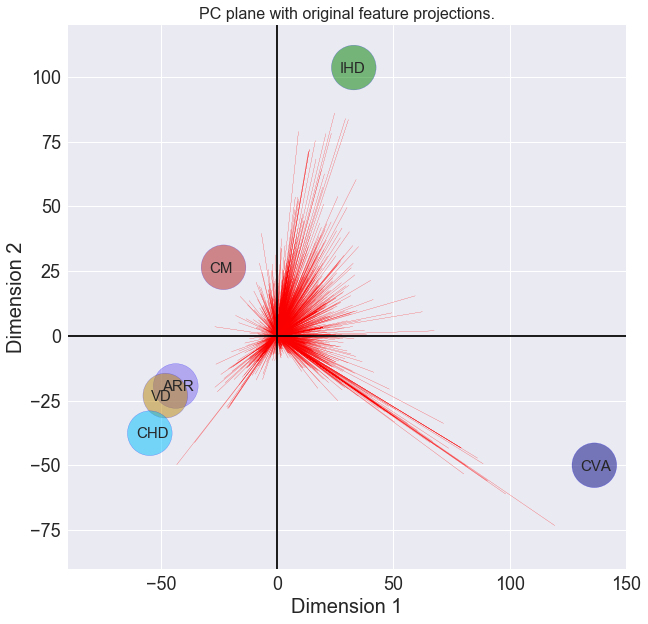

In [75]:
# Create a biplot
biplot(reduced_data, pca, fname = 'CVD-biplot.pdf')

### Normalized data PCA

In [51]:
cvddata = ndfn.copy(deep =True)
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components =2)
pca.fit(cvddata.T)


# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(cvddata.T)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)

In [72]:
def nbiplot(reduced_data, pca,fname):
   
  
    names  = ['CVA','IHD','CM','ARR','VD','CHD']
    clrs =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue']
    
    
    
    fig, ax = plt.subplots(figsize = (10,10))
    
    # scatterplot of the reduced CVDs  
    ax.scatter(x=reduced_data.loc[:,0]*20,\
               y=reduced_data.loc[:,1]*20, 
               facecolors=clrs,\
               edgecolors='b',\
               s=2000,\
               alpha=0.5)
   
     
    for i,x,y in zip([0,1,2,3,4,5],reduced_data.loc[:,0]*20,reduced_data.loc[:,1]*20):
        ax.annotate(names[i], xy=(x-3.0, y-1.0), xytext=(x-3.0, y-1.0),fontsize = 15)
   
        
    feature_vectors = pca.components_.T

    
    # we use scaling factors to make the arrows easier to see
    asize, tpos = 700, 500,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
           ax.arrow(0, 0, v[0]*asize, v[1]*asize, 
                          head_width=0.01,\
                          head_length=0.02,\
                          linewidth=0.1,\
                          color='red')
        
        
    plt.axis([-90, 150, -90, 120])
    ax.set_xlabel("Dimension 1", fontsize=20)
    ax.set_ylabel("Dimension 2", fontsize=20)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

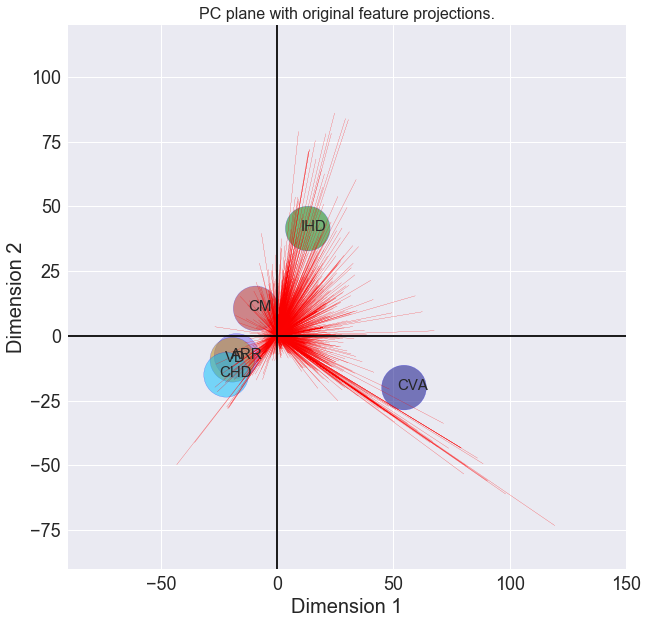

In [73]:
# Create a biplot
nbiplot(reduced_data, pca, fname = 'CVD-nbiplot.pdf')